# News headlines
A research at the VUB manually labeled some headlines. My first step in this research project is trying to predict those labels myself.

[News headlines](#News-headlines)<br>
[Data preparation](#Data-preparation)<br>
&emsp;[Import data](#Import-data)<br>
&emsp;[Test id for each row](#Test-id-for-each-row)<br>
&emsp;[Train-test split](#Train-test-split)<br>
[Scikit learn](#Scikit-learn)<br>
&emsp;[Feature vectors: Bag of words](#Feature-vectors%3A-Bag-of-words)<br>
&emsp;&emsp;[Tokenizing](#Tokenizing)<br>
&emsp;&emsp;[TF-IDF](#TF-IDF)<br>
&emsp;&emsp;[Classifier](#Classifier)<br>
&emsp;&emsp;[Pipeline](#Pipeline)<br>
&emsp;&emsp;[Evaluation](#Evaluation)<br>
&emsp;&emsp;&emsp;[MultinomialNB](#MultinomialNB)<br>
&emsp;&emsp;&emsp;[LinearSVC](#LinearSVC)<br>
&emsp;&emsp;&emsp;[Confusion Matrix](#Confusion-Matrix)<br>
&emsp;&emsp;[Parameter tuning: grid search](#Parameter-tuning%3A-grid-search)<br>
&emsp;[Different targets](#Different-targets)<br>
&emsp;&emsp;[Model](#Model)<br>
&emsp;&emsp;[Test all labels](#Test-all-labels)<br>
[Just simple rules](#Just-simple-rules)<br>
&emsp;[Functions](#Functions)<br>
&emsp;&emsp;[Lengte](#Lengte)<br>
&emsp;&emsp;[Vragen](#Vragen)<br>
&emsp;&emsp;[Interpunctie](#Interpunctie)<br>
&emsp;&emsp;[Lidwoorden](#Lidwoorden)<br>
&emsp;&emsp;[Cijfer](#Cijfer)<br>
&emsp;&emsp;[Citaat](#Citaat)<br>
&emsp;[Model & Evaluation](#Model-%26-Evaluation)<br>
&emsp;&emsp;[The model itself](#The-model-itself)<br>
&emsp;&emsp;[Lang](#Lang)<br>
&emsp;&emsp;[Vragen](#Vragen)<br>
&emsp;&emsp;[Interpunctie](#Interpunctie)<br>
&emsp;&emsp;[Lidwoorden](#Lidwoorden)<br>
&emsp;&emsp;[Cijfer](#Cijfer)<br>
&emsp;&emsp;[Citaat](#Citaat)<br>

# Data preparation
## Import data

In [6]:
import pandas as pd
import openpyxl # Dependency of pandas that's not automatically installed

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
df.head()

,Test,Headline ID,Winner,Headline,Actief,Lang,Vragen,Interpunctie,Tweeledigheid,Emotie,...,Lidwoorden,Adjectieven,Eigennamen,Betrekking,Voor+Achternaam,Cijfers,Quotes,Wat zit erin voor mij?,Modaliteit,Sensatie
0,1,A,False,Barack en Michelle Obama laten dansmoves zien ...,0,1,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
1,NaN,B,True,Barack en Michelle Obama gaan helemaal los tij...,1,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
2,2,A,True,Marc Coucke maakt opvallende keuze bij start v...,1,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
3,NaN,B,False,"Marc Coucke: ""Spelers van 10 miljoen? Neen, li...",1,0,0,0,1,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4,3,A,True,Maandag drukste dag van het jaar op Brussels A...,1,1,0,0,1,0,...,0,0,0,1,0,0,1,1.0,NaN,NaN


## Test id for each row
Currently, ownly the first row of each test has the test id. In order to group test together, let's add this id to all the rows of the test.

In [7]:
# iterate over dataframe rows, if test is NaN, set test id to previous test id
for i in range(1, len(df)):
    if pd.isna(df.iloc[i, 0]):
        df.iloc[i, 0] = df.iloc[i-1, 0]
df.head()

,Test,Headline ID,Winner,Headline,Actief,Lang,Vragen,Interpunctie,Tweeledigheid,Emotie,...,Lidwoorden,Adjectieven,Eigennamen,Betrekking,Voor+Achternaam,Cijfers,Quotes,Wat zit erin voor mij?,Modaliteit,Sensatie
0,1,A,False,Barack en Michelle Obama laten dansmoves zien ...,0,1,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
1,1,B,True,Barack en Michelle Obama gaan helemaal los tij...,1,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
2,2,A,True,Marc Coucke maakt opvallende keuze bij start v...,1,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
3,2,B,False,"Marc Coucke: ""Spelers van 10 miljoen? Neen, li...",1,0,0,0,1,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4,3,A,True,Maandag drukste dag van het jaar op Brussels A...,1,1,0,0,1,0,...,0,0,0,1,0,0,1,1.0,NaN,NaN


## Train-test split

In [8]:
# split dataframe into train and test
from sklearn.model_selection import train_test_split
# TODO: For some of the attributes, the values need to be grouped by test id before splitting.
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.head()

,Test,Headline ID,Winner,Headline,Actief,Lang,Vragen,Interpunctie,Tweeledigheid,Emotie,...,Lidwoorden,Adjectieven,Eigennamen,Betrekking,Voor+Achternaam,Cijfers,Quotes,Wat zit erin voor mij?,Modaliteit,Sensatie
374,143,A,False,Palma maakt komaf met 'onhandelbaar gedrag' va...,1,1,0,1,1,0,...,0,1,0,0,0,0,0,NaN,NaN,NaN
105,43,B,True,"Brandweer moet elke dag zeedijk afspuiten: ""Ze...",1,0,0,0,1,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
1924,769,B,True,"Marjolein uit 'Blind Getrouwd': ""Ze schreven d...",1,1,0,0,0,1,...,0,0,1,0,0,0,1,NaN,NaN,NaN
121,49,B,False,Het tragische verhaal van Demi Lovato: wereldw...,1,1,0,0,1,1,...,1,1,0,0,1,0,0,NaN,NaN,NaN
173,69,B,True,Een boze buur schreef een briefje over de romm...,1,1,0,0,0,0,...,1,0,0,0,0,0,0,NaN,NaN,NaN


# Scikit learn
Note that a lot of the code below is from [this tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

## Feature vectors: Bag of words
The text must be transformed into numerical feature vectors to use classic machine learning algorithms.

### Tokenizing
> Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
train_headlines = train.loc[:, "Headline "]
# All of those headlines get converted to a feature vector, the rows represent the different headlines, the columns represent how many times a certain word appears in that headline
X_train_counts = count_vect.fit_transform(train_headlines)
print(f"df_shape={train.shape}; x_train_counts_shape={X_train_counts.shape}")

df_shape=(1805, 22); x_train_counts_shape=(1805, 5171)


### TF-IDF
Longer documents will have a higher count. This problem can be solved by using the word frequency instead of the word count. The weight of words that occur in many documents will also be downscaled in tf-idf.

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1805, 5171)

### Classifier
I'm using Multinomial Naive Bayes, since this is one of the most suitable for word counts, accoording to the tutorial.

In [11]:
from sklearn.naive_bayes import MultinomialNB
train_target = train.loc[:, "Actief"] # Let's first try to predict whether given headline is active (doing something)
clf = MultinomialNB().fit(X_train_tfidf, train_target)

> To try to predict the outcome on a new document we need to extract the features using almost the same feature extracting chain as before. The difference is that we call transform instead of fit_transform on the transformers, since they have already been fit to the training set

In [12]:
docs_new = ["Proximus denkt aan eigen Belgische Netflix", # Should be labeled passive
            "Proximus werkt aan eigen Belgische Netflix", # Should be labeled active
            "Dat is schrikken: man verlaat zijn woning en komt prompt oog in oog te staan met zwarte beer", # active
            "Jongeman denkt zijn hond buiten te horen, maar als hij gaat kijken, wacht een onaangename verrassing", # passive
            ]

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print(f"{doc} => {category}")

Proximus denkt aan eigen Belgische Netflix => 1
Proximus werkt aan eigen Belgische Netflix => 1
Dat is schrikken: man verlaat zijn woning en komt prompt oog in oog te staan met zwarte beer => 1
Jongeman denkt zijn hond buiten te horen, maar als hij gaat kijken, wacht een onaangename verrassing => 1


It predicts all of them as active, which isn't really what I was hoping for.

### Pipeline
Put the steps together to create a pipeline.

In [13]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
])
text_clf.fit(train_headlines, train_target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

### Evaluation
#### MultinomialNB

In [14]:
import numpy as np

test_headlines = test.loc[:, "Headline "]
target_test = test.loc[:, "Actief"]

In [15]:
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
])
text_clf.fit(train_headlines, train_target)

predicted_mnb = text_clf.predict(test_headlines)
print(f"Accurate prediction ratio: {np.mean(predicted_mnb == target_test)}")

Accurate prediction ratio: 0.8451327433628318


#### LinearSVC

In [16]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
 ])

text_clf.fit(train_headlines, train_target)
predicted_svc = text_clf.predict(test_headlines)
print(f"Accurate prediction ratio: {np.mean(predicted_svc == target_test)}")

Accurate prediction ratio: 0.8495575221238938


#### Confusion Matrix

Confusion matrix for predicted_mnb:
              precision    recall  f1-score   support

     Passief       1.00      0.01      0.03        71
      Actief       0.84      1.00      0.92       381

    accuracy                           0.85       452
   macro avg       0.92      0.51      0.47       452
weighted avg       0.87      0.85      0.78       452



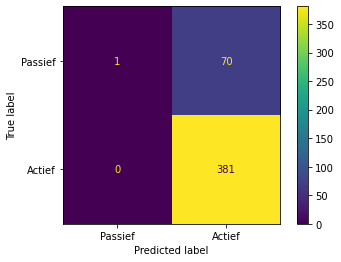

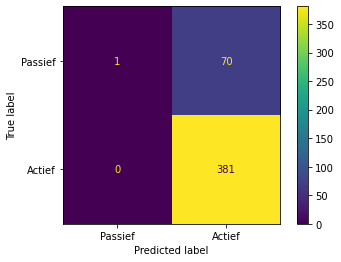

In [17]:
from sklearn import metrics
print("Confusion matrix for predicted_mnb:")
print(metrics.classification_report(target_test, predicted_mnb,
    target_names=["Passief", "Actief"]))
cm_mnb = metrics.confusion_matrix(target_test, predicted_mnb)
metrics.ConfusionMatrixDisplay.from_predictions(target_test, predicted_mnb, display_labels=["Passief", "Actief"]).plot()

Confusion matrix for predicted_svc:
              precision    recall  f1-score   support

     Passief       1.00      0.04      0.08        71
      Actief       0.85      1.00      0.92       381

    accuracy                           0.85       452
   macro avg       0.92      0.52      0.50       452
weighted avg       0.87      0.85      0.79       452



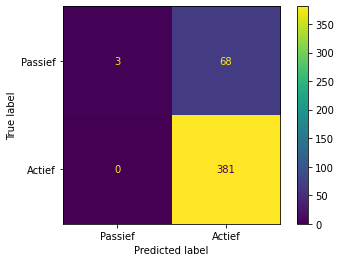

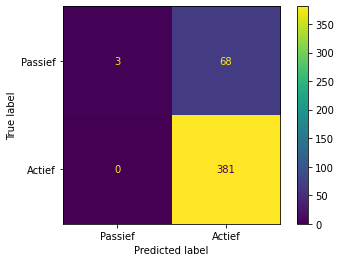

In [18]:
print("Confusion matrix for predicted_svc:")
print(metrics.classification_report(target_test, predicted_svc,
    target_names=["Passief", "Actief"]))
cm_svc = metrics.confusion_matrix(target_test, predicted_svc)
metrics.ConfusionMatrixDisplay.from_predictions(target_test, predicted_svc, display_labels=["Passief", "Actief"]).plot()

We can see the precission-recall tradeoff. For "Actief", we have a perfect precission (1.00), but a horrible recall (0.04). When plotting the confusion matrix, you can clearly see that almost everything gets predicted as "Actief".

### Parameter tuning: grid search

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'vect__ngram_range': [(1, 1), (1, 2)],
     'tfidf__use_idf': (True, False),
     'clf__alpha': (1e20, 1e15, 1e10, 1e5, 1e0, 1e-1, 1e-2, 1e-3, 1e-4),
}
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1) # Use all available CPU cores
gs_clf = gs_clf.fit(train_headlines[:400], train_target[:400]) # Search on smaller subset to speed up training

In [20]:
# Check the best score and the parameters related to it
# Note that the scores might be different, since we are using a small subset of the data
print(gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
     print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

0.835
clf__alpha: 1e+20
tfidf__use_idf: True
vect__ngram_range: (1, 1)


## Different targets
We used the "Actief" column as target up to now, but we also have some other data to precict.
### Model

In [21]:
def get_attribute_column(attribute, use_train=True):
    data = train if use_train else test
    return data.loc[:, attribute]

def get_fitted_model(train_data, train_target):
    text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=10, tol=None)),
    ])
    text_clf.fit(train_data, train_target)
    return text_clf

def get_predictions(model, test_data):
    return model.predict(test_data)

def train_and_get_confusion_matrix(data_column, model=None):
    train_headlines = get_attribute_column("Headline ", use_train=True)
    train_target = get_attribute_column(data_column, use_train=True)

    test_headlines  = get_attribute_column("Headline ", use_train=False)
    test_target     = get_attribute_column(data_column, use_train=False)

    model = get_fitted_model(train_headlines, train_target) if model is None else model
    predicted = get_predictions(model, test_headlines)

    metrics.ConfusionMatrixDisplay.from_predictions(test_target, predicted, display_labels=[f"{data_column} 0", f"{data_column} 1"]).plot()

### Test all labels

In [22]:
columns = list(df.columns)
skip_columns = ["Test ", "Headline ID", "Headline ", "Wat zit erin voor mij? ", "Modaliteit ",	"Sensatie"]
for column in skip_columns:
    assert column in columns
    columns.remove(column)
    assert column not in columns
columns

['Winner',
 'Actief',
 'Lang',
 'Vragen',
 'Interpunctie',
 'Tweeledigheid',
 'Emotie',
 'Voorwaartse Verwijzing ',
 'Signaalwoorden',
 'Lidwoorden',
 'Adjectieven',
 'Eigennamen',
 'Betrekking',
 'Voor+Achternaam',
 'Cijfers',
 'Quotes']

Training Winner
Training Actief
Training Lang
Training Vragen
Training Interpunctie
Training Tweeledigheid
Training Emotie
Training Voorwaartse Verwijzing 
Training Signaalwoorden
Training Lidwoorden
Training Adjectieven
Training Eigennamen


c:\users\arnod\documents\news-headlines-research\venv\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Training Betrekking
Training Voor+Achternaam
Training Cijfers
Training Quotes


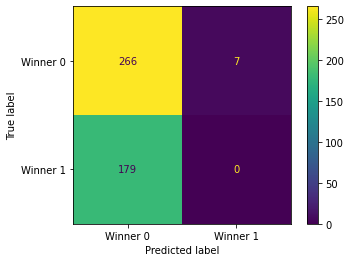

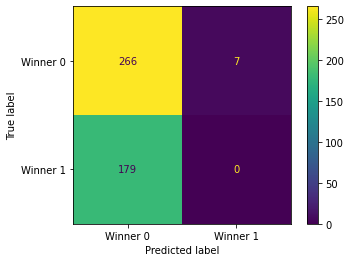

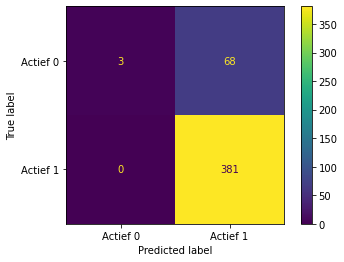

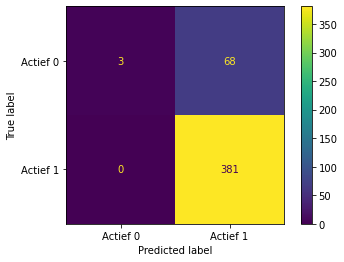

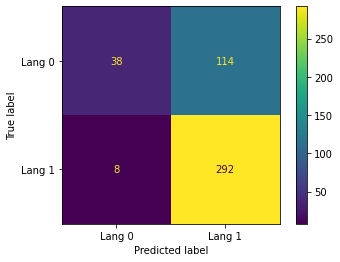

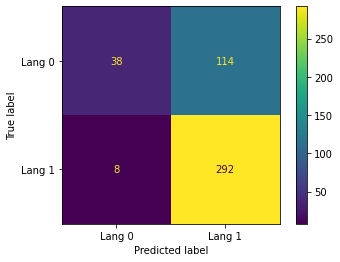

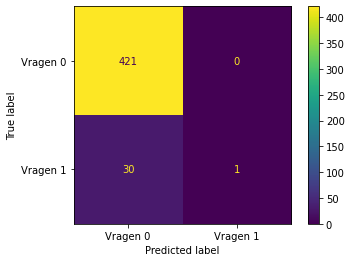

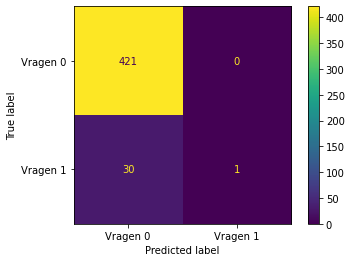

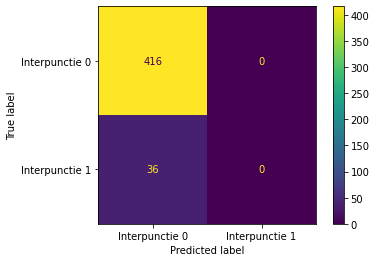

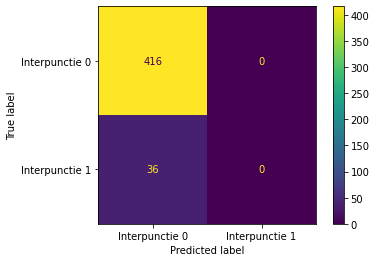

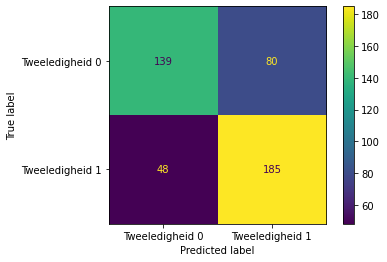

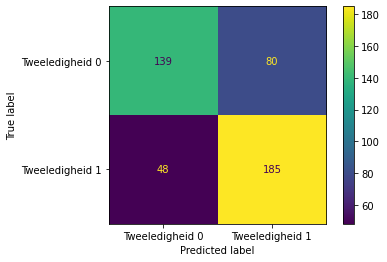

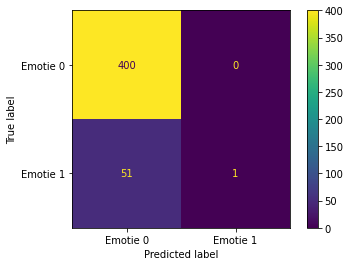

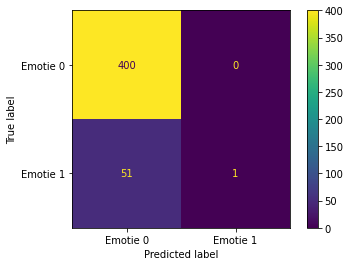

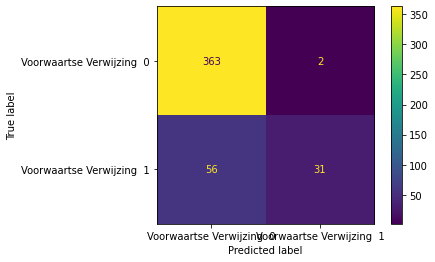

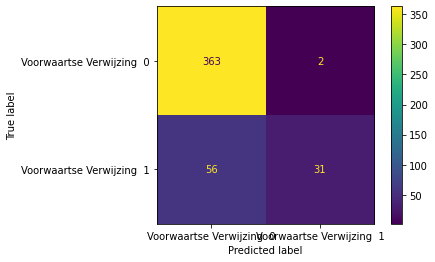

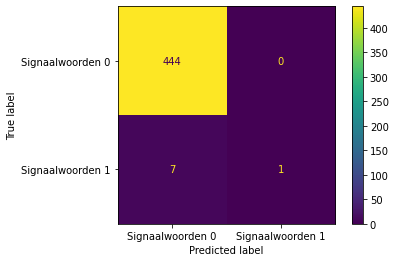

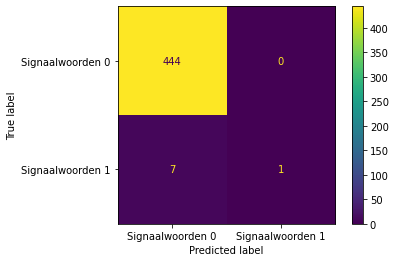

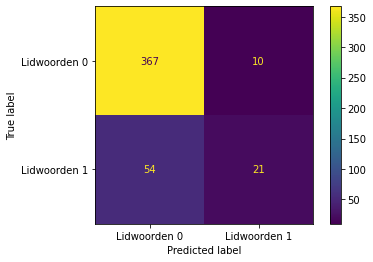

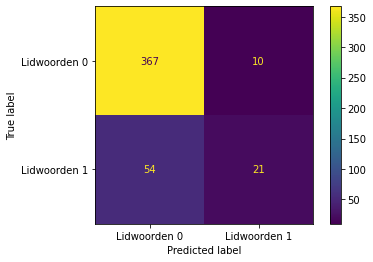

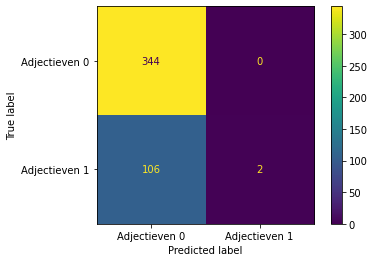

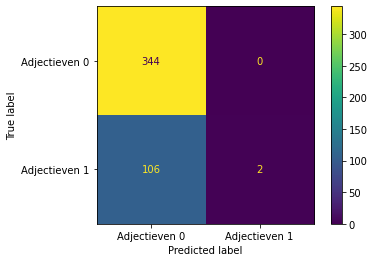

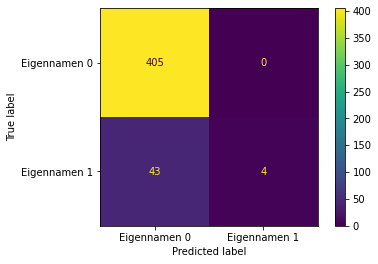

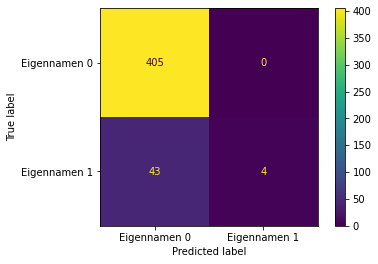

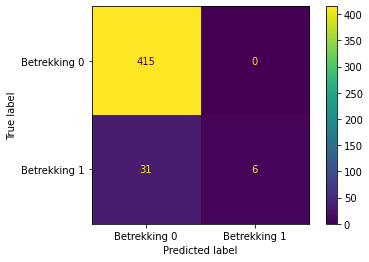

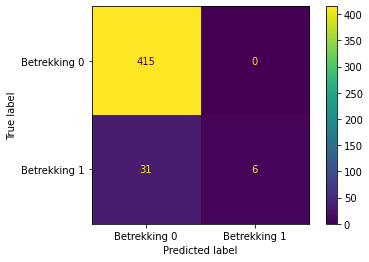

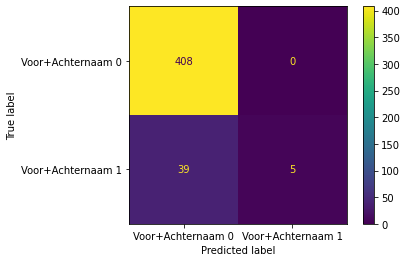

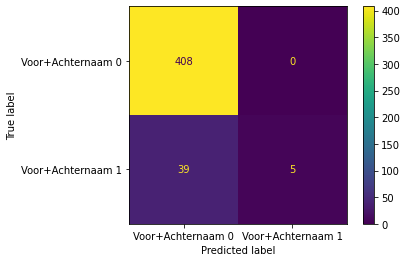

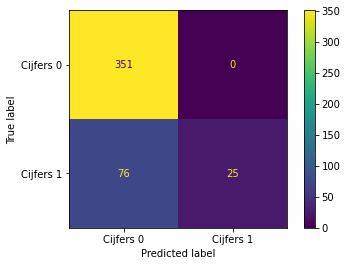

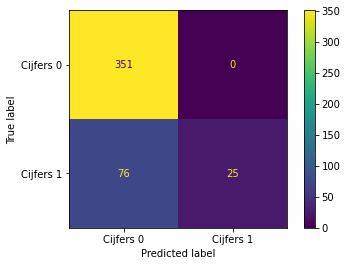

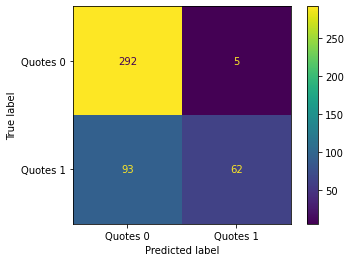

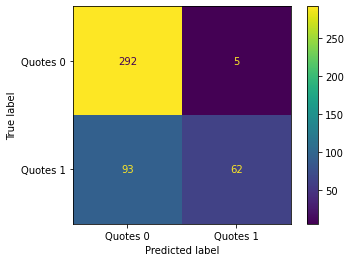

In [23]:
for label in columns:
    print(f"Training {label}")
    train_and_get_confusion_matrix(label)

It isn't producing good results for any of the labels, so let's try to improve it label per label.

# Just simple rules
Some of the labels don't need any complex algorithms, they can just be calculated by a simple function (based on their description in the paper).

## Functions
### Lengte
> Lange titels zouden beter werken dan korte, omdat
ze meer informatie kunnen doorspelen via de kop
aan de lezers. Onder korte koppen verstaan we in
deze studie krantenkoppen die minder dan 76 tekens
(inclusief spaties) bevatten. Lange krantenkoppen
zijn dan koppen die uit 76 of meer tekens bestaan.

In [52]:
def is_long_headline(headline):
    return len(headline) >= 76

print(is_long_headline("Doel: Vandeput een hak zetten. Resultaat: Crombez in z'n hemd gezet"))
print(is_long_headline("Vermoedelijk vervalste mails brengen Crombez (SP.A) in verlegenheid: \"Ik had ze beter niet gebruikt\""))

False
True


### Vragen
> Vragen in krantenkoppen zouden beter werken
omdat ze lezers aan het denken zetten; mensen
worden nieuwsgierig naar de inhoud van het artikel
omdat ze een antwoord op de gestelde vraag willen
verkrijgen.

In [25]:
def contains_question(headline):
    return "?" in headline

print(contains_question("Een derde van de films in de cinema’s zijn prequels of sequels: hoe komt dat?"))

True


### Interpunctie
> Met uitroeptekens (1) willen journalisten sterke
emoties opwekken bij de lezers waardoor ze zouden
getriggerd zijn om te klikken. Door beletseltekens (2)
te gebruiken zorgen journalisten dan weer voor een
cliffhanger-gevoel bij de lezers. Aanhalingstekens (3)
kunnen ofwel betekenen dat er een citaat in de kop
staat of dat er een aanname wordt gemaakt. Bij
interpunctie kijken we alleen naar aanhalingstekens
die dienen als aanname.

In [26]:
def contains_interpunct(headline):
    return "!" in headline or "..." in headline or headline.count("'") >= 2

print(contains_interpunct("Bestuurder rijdt 3 kilometer (!) achteruit \"door defect\" en legt positieve drugstest af"))
print(contains_interpunct("Deze man rijdt letterlijk zijn gras af, maar of dat nu de meeste effectieve manier is..."))
print(contains_interpunct("Deze vijfjarige is 'het mooiste meisje op Instagram'"))

True
True
True


### Lidwoorden
>  Lidwoorden worden tegenwoordig nog steeds
weggelaten uit krantenkoppen. In de analyse wordt
er enkel gekeken naar lidwoorden die kunnen
weggelaten worden; we nemen dus vaste clusters
(bv. uit de biecht klappen, uit de hand lopen, het
wordt, enz.) en lidwoorden in quotes niet op in de
analyse.

In [27]:
def contains_article_word(headline):
    return "de" in headline or "het" in headline or "een" in headline

print(contains_article_word("Arrestant klimt op dak van rijdende politiewagen, maar agent heeft de oplossing: gewoon doorrijden"))

True


### Cijfer
> Het gebruik van cijfers in koppen maakt de inhoud
van het artikel voorspelbaar voor de lezers. Het geeft
hen zekerheid waardoor ze weten wat ze kunnen
verwachten. Cijfers kunnen krantenkoppen
interessanter maken, vooral wanneer het gaat om
grote getallen (1). Ook kunnen cijfers inspelen op de
gevoelens van mensen door bijvoorbeeld de leeftijd
weer te geven (2).

In [28]:
def contains_number_word(headline):
    # Note: I didn't write this entire list all by myself, it was suggested by GitHub Co-Pilot
    numbers = ["één", "twee", "drie", "vier", "vijf", "zes", "zeven", "acht", "negen", "tien", "elf", "twaalf", "dertien", "veertien", "vijftien", "zestien", "zeventien", "achttien", "negentien", "twintig", "dertig", "veertig", "vijftig", "zestig", "zeventig", "tachtig", "negentig", "honderd", "duizend", "miljoen", "miljard", "biljoen", "biljard", "triljoen"] #, "triljard", "quadriljoen", "quadriljard", "quintiljoen", "quintiljard", "sextiljoen", "sextiljard", "septiljoen", "septiljard", "octiljoen", "octiljard", "noniljoen", "noniljard", "deciljoen", "deciljard", "undeciljoen", "undeciljard", "duodeciljoen", "duodeciljard", "tredeciljoen", "tredeciljard", "quattuordeciljoen", "quattuordeciljard", "quindeciljoen", "quindeciljard", "sexdeciljoen", "sexdeciljard", "septendeciljoen", "septendeciljard", "octodeciljoen", "octodeciljard", "novemdeciljoen", "novemdeciljard", "vigintiljoen", "vigintiljard", "unvigintiljoen", "unvigintiljard", "duovigintiljoen", "duovigintiljard", "trevigintiljoen", "trevigintiljard", "quattuorvigintiljoen", "quattuorvigintiljard", "quinquavigintiljoen", "quinquavigintiljard", "sexvigintiljoen", "sexvigintiljard", "septenvigintiljoen",
    headline = headline.lower()
    for number in numbers:
        if number in headline:
            return True
    return False

def contains_number(headline):
    # TODO? This doesn't check numbers written as text (e.g. "five")
    return any(char.isdigit() for char in headline) # or contains_number_word(headline)

print(contains_number("Iedereen dacht dat 313 kinderen ziek werden door zijn lasagne, maar dat klopt niet: \"Wat dan wél?\""))
print(contains_number("Kranige oma (93) bewijst dat er op angst overwinnen geen leeftijd staat"))

True
True


### Citaat
> Een citaat benadrukt een belangrijk deel van het
artikel, waardoor het de lezers prikkelt om ook het
achterliggende verhaal te willen lezen.

In [29]:
def contains_quote(headline):
    return "\"" in headline

print(contains_quote("Pakkende getuigenis van ex-gevangene: \"In de cel hingen de muren vol stront\""))

True


## Model & Evaluation
### The model itself

In [30]:
class SimpleFunctionModel(object):
    def __init__(self, function):
        self.function = function

    def predict(self, headlines):
        # Apply self.function to each of the elements in headlines
        return np.vectorize(self.function)(headlines)

### Lang

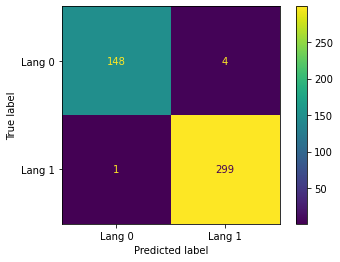

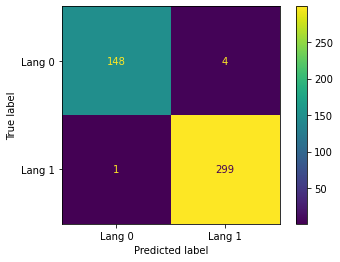

In [53]:
train_and_get_confusion_matrix("Lang", model=SimpleFunctionModel(is_long_headline))

This model is a lot better, but there are still a few (4) wrong predictions. Let's check what the wrong results are.

In [32]:
def get_wrong_predictions(predictions, target_predictions, headlines):
    wrong_predictions = []
    target_predictions = np.array(target_predictions)
    headlines = np.array(headlines)
    for i in range(len(predictions)):
        if predictions[i] != target_predictions[i]:
            wrong_predictions.append((headlines[i], predictions[i], target_predictions[i]))
    return wrong_predictions

def predict_and_get_wrong_predictions(attribute, model):
    target = get_attribute_column(attribute, use_train=False)
    headlines = get_attribute_column("Headline ", use_train=False)
    predictions = model.predict(headlines)
    return get_wrong_predictions(predictions, target, headlines)

In [54]:
def output_wrong_predictions(attribute, model):
    wrong_predictions = predict_and_get_wrong_predictions(attribute, model)
    for headline, prediction, target in wrong_predictions[:5]:
        print(f"Predicted {prediction}, but should be {target} for {headline} (length {len(headline)})")
    if len(wrong_predictions) > 5:
        print(f"And {len(wrong_predictions) - 5} more")

output_wrong_predictions("Lang", SimpleFunctionModel(is_long_headline))

Predicted True, but should be 0 for Wat kan je doen tegen ouder worden? Martine Prenen geeft tien bruikbare tips (length 76)
Predicted True, but should be 0 for Met deze tip van David Attenborough help je uitgeputte bijen er weer bovenop (length 76)
Predicted True, but should be 0 for "Verkrachting te zwaar bestraft": bekende feministe doet opvallende uitspraken (length 78)
Predicted False, but should be 1 for Halfnaakte Kim Kardashian lijkt blij dat 'mei plasticvrij' voorbij is (length 69)
Predicted True, but should be 0 for Speelster bevestigt dat Anderlecht vrouwenploeg opdoekt, Marc Coucke ontkent (length 76)


Predicted True, but should be 0 for De bedgeheimen van Radja: "Vrouwen? Ik ben geen engel, je moet gewoon zien dat niks uitkomt" (length 92)
Predicted True, but should be 0 for Wil je de historische match van de Rode Duivels tegen Brazilië meemaken? Dit moet je weten (length 90)
Predicted False, but should be 1 for Moeten we de stekkers nog uittrekken en alle andere dingen die u moet weten over onweer (length 87)
Predicted True, but should be 0 for "Thermische vore, explosieve cyclogenese en Cumulonimbus arcus": begrijpt u nog iets van het weerbericht? (length 105)
Predicted True, but should be 0 for Valsspeler ontmaskerd? Schimmige 'Travel Club Express' houdt ermee op (length 69)
And 6 more


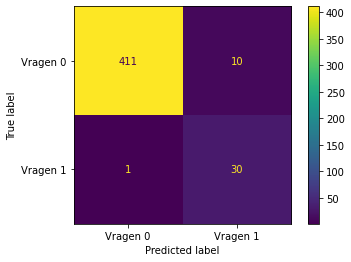

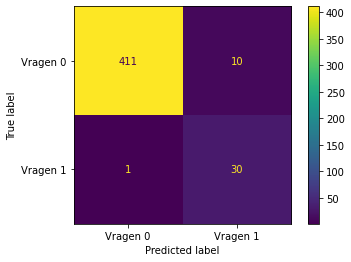

In [34]:
def get_evaluation(attribute, function):
    model = SimpleFunctionModel(function)
    train_and_get_confusion_matrix(attribute, model=model)
    output_wrong_predictions(attribute, model)

get_evaluation("Vragen", contains_question)

There is still a question without a question mark. Most of the false positives are retorical questions.

### Interpunctie

Predicted True, but should be 0 for Horrorfilm 'Hereditary' is zo griezelig dat kijkers na afloop noodnummer kunnen bellen (length 86)
Predicted True, but should be 0 for Kevin en Megan weer samen na 'Temptation Island', "tot hij seks had met een hippie" (length 83)
Predicted False, but should be 1 for Links afslaan: hier mocht het wel én niet (length 41)
Predicted False, but should be 1 for "De man die Weinstein begroef" moet nu zelf opstappen (en dat vindt het Trump-kamp geweldig) (length 92)
Predicted True, but should be 0 for Mike uit 'Blind Getrouwd' stapt in de politiek (length 46)
And 36 more


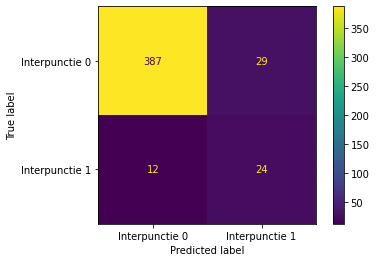

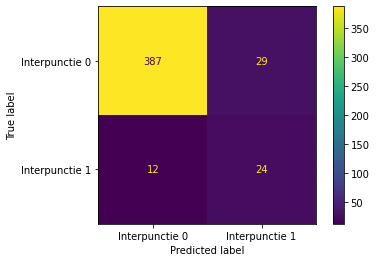

In [35]:
get_evaluation("Interpunctie", contains_interpunct)

### Lidwoorden

Predicted True, but should be 0 for De man die weigert te wijken voor nieuwe kustflats: "Ik verlaat mijn huisje alleen in een kist" (length 95)
Predicted True, but should be 0 for Frontale crash combi en politievoertuig: inbrekers kunnen ontkomen na wilde achtervolging (length 89)
Predicted True, but should be 0 for Vlaamse duiker over redding Thaise voetballers: "Grootste vrees is dat de maskers gaan lekken" (length 94)
Predicted True, but should be 0 for Auto ramt gebouw De Telegraaf en vliegt in brand: "Dit is een aanslag, maar wij laten ons niet intimideren" (length 107)
Predicted True, but should be 0 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
And 281 more


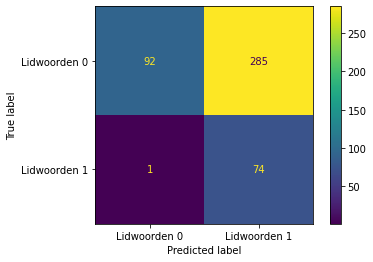

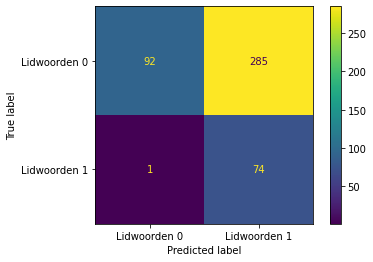

In [36]:
get_evaluation("Lidwoorden", contains_article_word)

The current function checks for all articles, while the reserch only counted articles that could be omitted, so there are a lot of false positives.
### Cijfer

Predicted False, but should be 1 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
Predicted False, but should be 1 for Thais mirakel is compleet: alle voetballertjes en hun coach na zeventien bange dagen bevrijd uit grot (length 101)
Predicted False, but should be 1 for Wat kan je doen tegen ouder worden? Martine Prenen geeft tien bruikbare tips (length 76)
Predicted True, but should be 0 for Met welke Rode Duivels kunnen we verder en met wie niet? Deze defensie haalt 2022 niet (length 86)
Predicted False, but should be 1 for Vlaamse steden zetten zich schrap voor "risicomatch" Marokko-Iran: "Vierhonderd extra agenten klaar" (length 100)
And 25 more


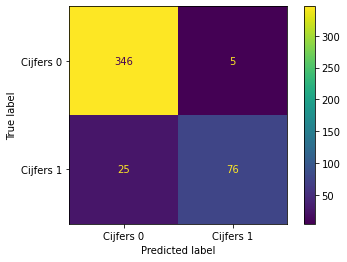

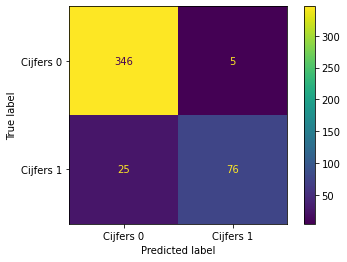

In [37]:
get_evaluation("Cijfers", contains_number)

### Citaat

Predicted True, but should be 0 for Nieuwe partij gaat voor gelijkheid van toiletten en zoekt "excuusmannen" (length 72)
Predicted True, but should be 0 for Stranden populaire vakantiebestemming overspoeld door "monsterachtige" kwallen (length 78)
Predicted True, but should be 0 for "De man die Weinstein begroef" moet nu zelf opstappen (en dat vindt het Trump-kamp geweldig) (length 92)
Predicted True, but should be 0 for Auto ramt gevel van Nederlandse krant De Telegraaf: "Aanslag" (length 61)
Predicted True, but should be 0 for Reusachtig "monster" zaait paniek onder toeristen in populaire badplaats (length 72)
And 9 more


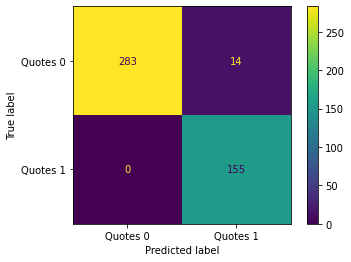

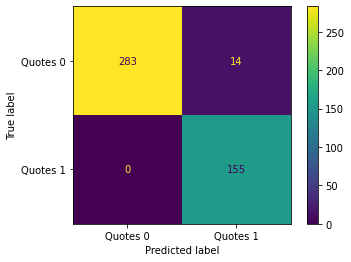

In [38]:
get_evaluation("Quotes", contains_quote)

# Focus on label per label
Up to now, I tried to find a general approach for all of the labels, but because of the large differences in types of labels (e.g. length vs emotion), I'll try to get a seperate model per label.

## Actief
### Details
#### Meaning
> Een actieve of passieve constructie wijst op de vorm die  het  werkwoord  aanneemt  in  de  zin.  Er  zouden eerder   actieve   constructies   worden   gebruikt   in koppen, dan passieve.Ook   verstaan   we   in   deze   studie   onder   actieve constructies koppen die directer overkomen dan hun concurrentie, die misschien wat meer omslachtig is.Bij  een  directe  kop  staat  het  hoofdnieuws  van  het artikel vooraan, een indirectere kop geeft eerst nog watalgemene of onbeduidende informatie.
#### Example
> Actief: Weg met perfectie: H&M werktde kleine details van bikinimodellen niet langer weg
> Passief:  Weg  met  perfectie:  striemen,  beharing en littekens     van badpakmodellen H&M (worden) niet langer gefotoshopt
> Directer: Proximus werktaan  eigen  Belgische Netflix
> Indirecter: Proximus denktaan  eigen  Belgische Netflix
### Past paricle
A passive construction will often contain a past particle, so it might be useful to train a model to search for those. However, this won't be an ideal scenario, since more indirect forms (like the one given above using "to think") will be ignored with this.
In the English language, we have following markers for a passive construction: be, -ed and by ([src](https://www.academypublication.com/issues/past/jltr/vol01/06/32.pdf), Classification and SLA Studies of Passive Voice, Yuanying Wang). This translates in dutch to forms of "worden", "ge-" and "door".


In [43]:
def is_passive(headline):
    # Check if any word in headline start with "ge"
    for word in headline.split():
        if word.startswith("ge") or word.startswith("Ge"):
            return True
        if word == "door" or word == "Door":
            return True
        if "word" in word or word in ["zijn", "is", "ben", "bent"]: # Check for any form of the verb "worden"
            return True
    return False

def is_active(headline):
    return not is_passive(headline)

print(is_passive("Verdachte gevlucht na overval"))

True


Predicted False, but should be 1 for Joël eert overleden vrouw met zijn tuin: meer dan 800 planten en een verborgen droomhuisje (length 90)
Predicted False, but should be 1 for Auto ramt gebouw De Telegraaf en vliegt in brand: "Dit is een aanslag, maar wij laten ons niet intimideren" (length 107)
Predicted False, but should be 1 for De maat is vol: banken nemen maatregelen na zoveelste plofkraak in korte tijd (length 77)
Predicted False, but should be 1 for Deze man heeft echt geen zin om het gras te maaien, maar of zijn oplossing nu zo handig is... (length 93)
Predicted False, but should be 1 for Net gewone mensen: Beyoncé en Jay Z delen vakantiefoto's (length 56)
And 186 more


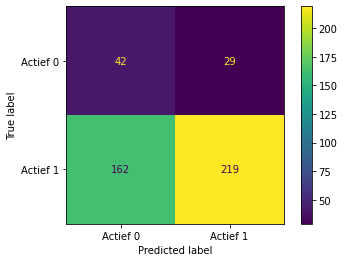

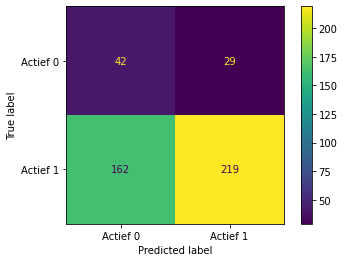

In [44]:
get_evaluation("Actief", is_active)

Too much words starting with "Ge-" (e.g. Geen,gewoon, gebouw, ...) are seen as passive indications, even though they aren't. Let's try without the "ge-" prefix detection.

Predicted False, but should be 1 for Joël eert overleden vrouw met zijn tuin: meer dan 800 planten en een verborgen droomhuisje (length 90)
Predicted False, but should be 1 for Auto ramt gebouw De Telegraaf en vliegt in brand: "Dit is een aanslag, maar wij laten ons niet intimideren" (length 107)
Predicted True, but should be 0 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
Predicted False, but should be 1 for De maat is vol: banken nemen maatregelen na zoveelste plofkraak in korte tijd (length 77)
Predicted False, but should be 1 for Deze man heeft echt geen zin om het gras te maaien, maar of zijn oplossing nu zo handig is... (length 93)
And 131 more


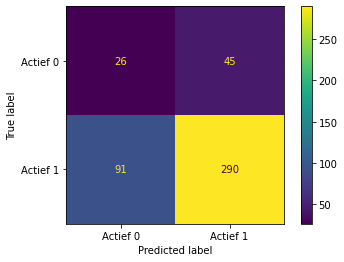

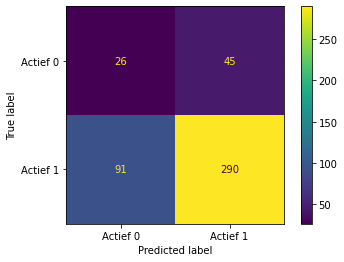

In [46]:
def is_active_no_ge_prefix(headline):
    # Check if any word in headline start with "ge"
    for word in headline.split():
        if word == "door" or word == "Door":
            return False
        if "word" in word or word in ["zijn", "is", "ben", "bent"]: # Check for any form of the verb "worden"
            return False
    return True

get_evaluation("Actief", is_active_no_ge_prefix)

Still not good, try checking words starting with ge- and ending with -d (still only regular past particle forms then).

Predicted False, but should be 1 for Joël eert overleden vrouw met zijn tuin: meer dan 800 planten en een verborgen droomhuisje (length 90)
Predicted False, but should be 1 for Auto ramt gebouw De Telegraaf en vliegt in brand: "Dit is een aanslag, maar wij laten ons niet intimideren" (length 107)
Predicted True, but should be 0 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
Predicted False, but should be 1 for De maat is vol: banken nemen maatregelen na zoveelste plofkraak in korte tijd (length 77)
Predicted False, but should be 1 for Deze man heeft echt geen zin om het gras te maaien, maar of zijn oplossing nu zo handig is... (length 93)
And 133 more


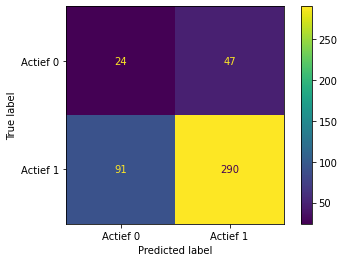

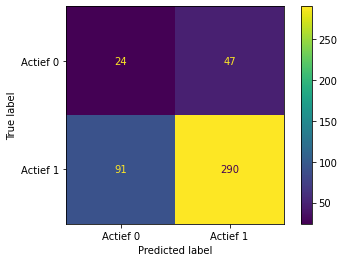

In [48]:
def is_active_ge_d(headline):
    # Check if any word in headline start with "ge"
    for word in headline.split():
        if (word.startswith("ge") or word.startswith("Ge")) and word.endswith("d"):
            return True
        if word == "door" or word == "Door":
            return False
        if "word" in word or word in ["zijn", "is", "ben", "bent"]: # Check for any form of the verb "worden"
            return False
    return True

get_evaluation("Actief", is_active_ge_d)

Almost no difference, slightly worse. A lot of false passives are because of the word "is", let's see what dropping that condition gives us:

Predicted True, but should be 0 for Vlaamse duiker over redding Thaise voetballers: "Grootste vrees is dat de maskers gaan lekken" (length 94)
Predicted True, but should be 0 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
Predicted True, but should be 0 for Cannabiskweker, ex-model en dronkaard: de familie van Meghan die niet uitgenodigd is op de trouw (length 96)
Predicted True, but should be 0 for Wat krijg je als je een actieve vulkaan combineert met een wervelwind? Spectaculaire beelden (length 92)
Predicted False, but should be 1 for Nieuwe partij gaat voor gelijkheid van toiletten en zoekt "excuusmannen" (length 72)
And 79 more


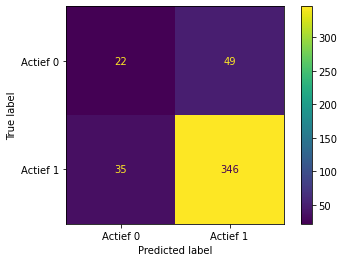

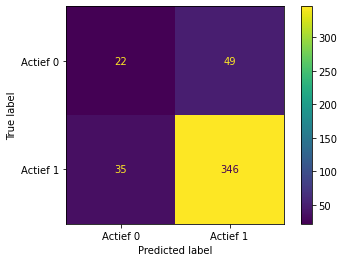

In [51]:
def is_active_no_is(headline):
    # Check if any word in headline start with "ge"
    for word in headline.split():
        if (word.startswith("ge") or word.startswith("Ge")) and word.endswith("d"):
            return False
        if word == "door" or word == "Door":
            return False
        if "word" in word or word in ["ben", "bent"]: # Check for any form of the verb "worden"
            return False
    return True

get_evaluation("Actief", is_active_no_is)

Slightly better, but still not optimal.

## Lang
Clear description (#chars > 76), so good results with rule manually implemented. (see above)

## Vragen
Questions are easily recognizable because of a question mark, giving quite good results. (see above)

## Interpunctie
Also a simple check for the different interpunction characters (!, '*' and ...) works quite good. (see above)


## Tweeledigheid
### Details
#### Meaning
> Titels die bestaan uit twee delen; meestal bestaan ze uit  een  gewone  kopaan  de  ene  kant  en  een  quote aan de andere kant, dit tweede deel kan echter ook gewoon wat extra uitleg zijn. De twee delen worden meestal gescheiden door een dubbelpunt, maar kan ook gewoon door een punt.
#### Example
> Amper  schaduw,  geen  voedsel  of  water: baasje laat hond aan lot over ondanks hittegolf
### Manual rule
We can simply implement this rule manually, by looking at a column (:) or a (".") somewhere in the headline. Note that we also need to check it's actually "." and not "..."



Predicted True, but should be 0 for Frontale crash combi en politievoertuig: inbrekers kunnen ontkomen na wilde achtervolging (length 89)
Predicted True, but should be 0 for Deze man heeft echt geen zin om het gras te maaien, maar of zijn oplossing nu zo handig is... (length 93)
Predicted True, but should be 0 for Dit verandert allemaal vanaf vandaag: tunnel gaat maanden dicht, dokters, zelfrijdende auto's,... (length 97)
Predicted True, but should be 0 for Cannabiskweker, ex-model en dronkaard: de familie van Meghan die niet uitgenodigd is op de trouw (length 96)
Predicted False, but should be 1 for Wat krijg je als je een actieve vulkaan combineert met een wervelwind? Spectaculaire beelden (length 92)
And 25 more


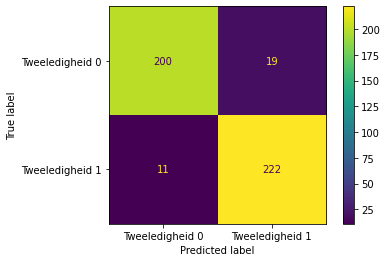

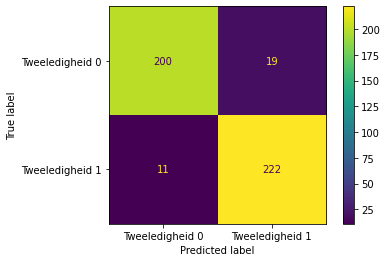

In [57]:
def count_occurrences(string, sub):
    # Util function, count #times sub occurs in string, generated using GitHub Copilot
    count = start = 0
    while True:
        start = string.find(sub, start) + 1
        if start > 0:
            count += 1
        else:
            return count

def contains_two_lids(headline):
    return ": " in headline or ("." in headline and count_occurrences(headline, ".")*3 != count_occurrences(headline, "..."))

get_evaluation("Tweeledigheid", contains_two_lids)